In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statistics as stat

from sklearn.linear_model import LinearRegression  # new tool

In [2]:
datafile = '../../dataset/ch07/burger_king_items.txt'
bk = pd.read_csv(datafile, sep='\t')

In [3]:
bk.info

<bound method DataFrame.info of                            Item  Serving.size  Calories  Fat.Cal  Protein(g)  \
0                     Hamburger         109.0       260     90.0          13   
1                  Cheeseburger         121.0       300    130.0          16   
2              Double_Hamburger         146.0       360    160.0          22   
3           Double_Cheeseburger         171.0       450    230.0          26   
4                   Buck_Double         158.0       410    200.0          24   
..                          ...           ...       ...      ...         ...   
117            FatFREEMilk(8oz)           NaN        90      0.0           9   
118  1%LowFatChocolateMilk(8oz)           NaN       160     25.0           8   
119     VanillaMilkShake12fl oz           NaN       350    100.0           8   
120   ChocolateMilkShake12fl oz           NaN       400    100.0           8   
121  StrawberryMilkShake12fl oz           NaN       390    100.0           8   

     Fa

In [4]:
len(bk)

122

In [5]:
bk.columns

Index(['Item', 'Serving.size', 'Calories', 'Fat.Cal', 'Protein(g)', 'Fat(g)',
       'Sat.Fat(g)', 'Trans.fat(g)', 'Chol(mg)', 'Sodium(mg)', 'Carbs(g)',
       'Fiber(g)', 'Sugar(g)', 'Meat', 'Breakfast', 'Not Breakfast',
       'CarbsxMeat'],
      dtype='object')

In [6]:
bk.head()

,Item,Serving.size,Calories,Fat.Cal,Protein(g),Fat(g),Sat.Fat(g),Trans.fat(g),Chol(mg),Sodium(mg),Carbs(g),Fiber(g),Sugar(g),Meat,Breakfast,Not Breakfast,CarbsxMeat
0,Hamburger,109.0,260,90.0,13,10.0,4.0,0.0,35,490,28,1.0,6,1,0,1,28
1,Cheeseburger,121.0,300,130.0,16,14.0,6.0,0.0,45,710,28,1.0,6,1,0,1,28
2,Double_Hamburger,146.0,360,160.0,22,18.0,8.0,0.0,70,520,28,1.0,6,1,0,1,28
3,Double_Cheeseburger,171.0,450,230.0,26,26.0,12.0,1.0,95,960,29,1.0,6,1,0,1,29
4,Buck_Double,158.0,410,200.0,24,22.0,10.0,0.5,85,740,28,1.0,6,1,0,1,28


In [7]:
fat = bk['Fat(g)']  # y (response)
protein = bk['Protein(g)']  # x (control)

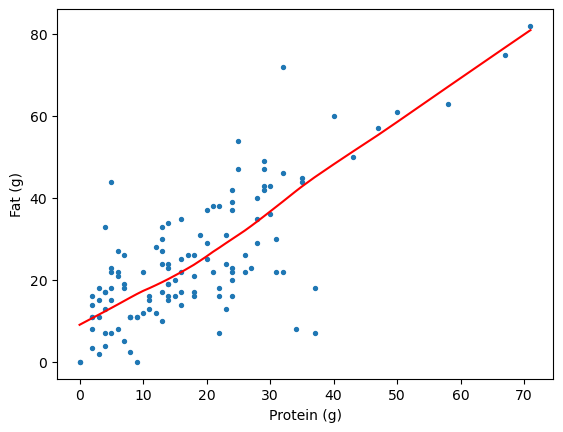

In [8]:
plt.scatter(protein, fat,
            s=8, marker='o');
smoothed = sm.nonparametric.lowess(fat, protein)
plt.plot(smoothed[:, 0], smoothed[:, 1], 'r');
plt.xlabel('Protein (g)')
plt.ylabel('Fat (g)');  # this is what we learned in ch6

In [9]:
linear_fit = LinearRegression()  # now in ch7 we do linear fit

In [10]:
x = np.array(protein).reshape(-1, 1)  # fit function below requires:
# 1. the factor(s) is 2-dimensional; and 
# 2. the factor(s) have as many rows as the length of y
y = np.array(fat)

In [11]:
linear_fit.fit(x, y)  # intrinsically a multiple regression implementation

LinearRegression()

In [12]:
round(linear_fit.coef_[0], 3), round(linear_fit.intercept_, 3)

(0.913, 8.402)

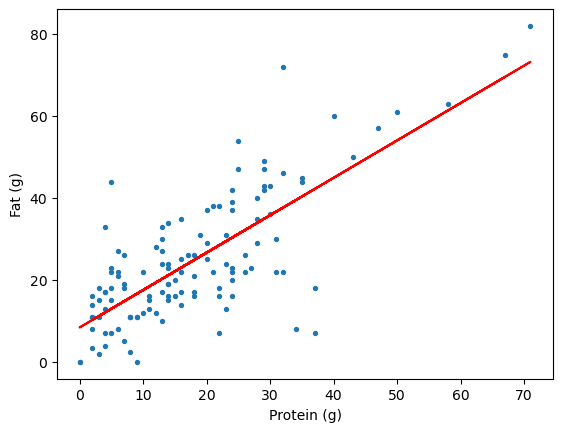

In [13]:
plt.scatter(x, y, s=8, marker='o');  # scatterplot
plt.plot(x, linear_fit.predict(x), 'r');  # the least square line
plt.xlabel('Protein (g)')
plt.ylabel('Fat (g)');

In [14]:
# standard mean and SD calculations
x_bar = x.mean()
y_bar = y.mean()
sd_x = x.std(ddof=1)
sd_y = y.std(ddof=1)
# linear correlation coefficient
r = np.corrcoef(x.reshape(1, -1), y)[0, 1]
# report the result
x_bar, y_bar, sd_x, sd_y, r

(17.934426229508198,
 24.778688524590162,
 13.389114676364041,
 16.13361681874983,
 0.7578002849027415)

In [15]:
b_1 = r * sd_y / sd_x  # apply formula
round(b_1, 3)

0.913

In [16]:
b_0 = y_bar - b_1 * x_bar  # apply formula
round(b_0, 3)

8.402

In [17]:
e = y - linear_fit.predict(x)

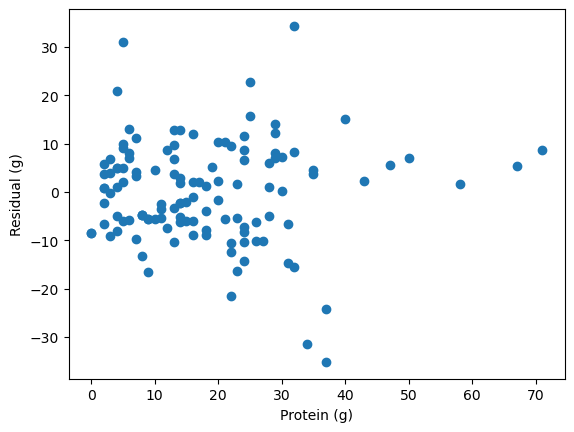

In [18]:
plt.scatter(x, e);  # in simple regression, we may plot residual against the control x
plt.xlabel('Protein (g)')
plt.ylabel('Residual (g)');

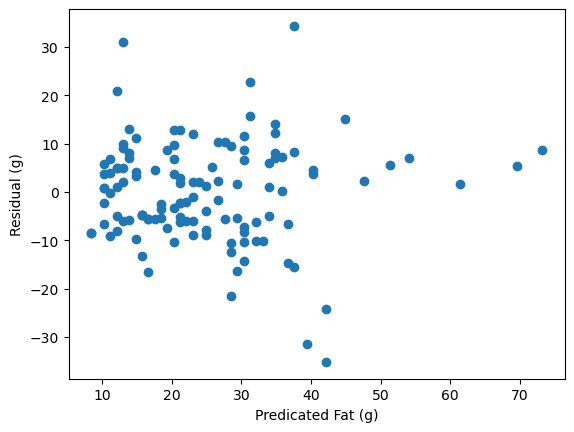

In [19]:
plt.scatter(linear_fit.predict(x), e);  # in general, we plot residual against predicted y
plt.xlabel('Predicated Fat (g)')
plt.ylabel('Residual (g)');

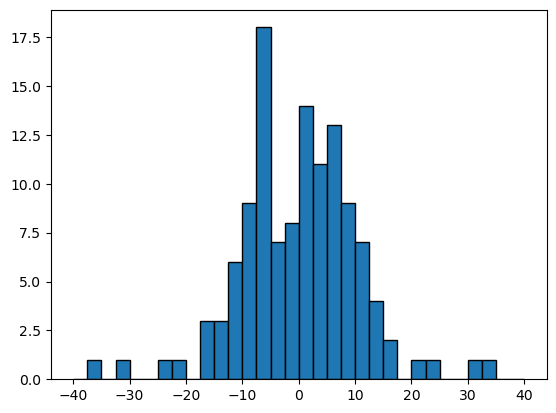

In [20]:
plt.hist(e, bins=np.linspace(-40, 40, 33), edgecolor='k');

In [21]:
round(e.mean(), 6)

0.0

In [22]:
e.std(ddof=2)

10.570739718301777

In [23]:
np.sqrt(np.sum(e ** 2)/(len(e)-2))

10.570739718301777

## Below are simple linear regression examples on machine generated data

## Regression of a NON-linear signal

In [24]:
# a nonlinear signal plus noise

from math import pi
x = np.linspace(-pi, pi, 1000)
noise = np.random.normal(0, 1, 1000)
y = np.sin(x) * 2 + noise

In [25]:
x = x.reshape(-1 ,1)
linear_fit.fit(x, y)

LinearRegression()

Text(0, 0.5, 'y')

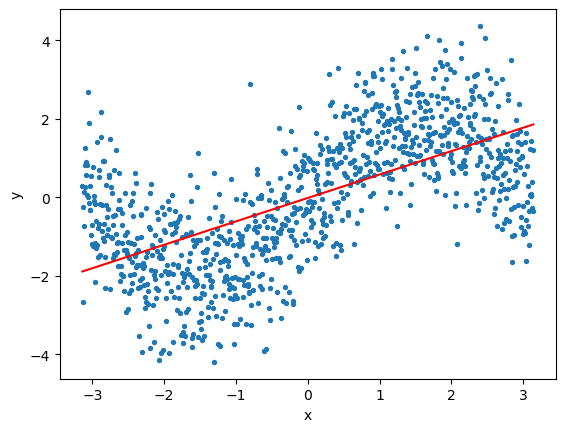

In [26]:
plt.scatter(x, y, s=8, marker='o')
plt.plot(x, linear_fit.predict(x), 'r')
plt.xlabel('x')
plt.ylabel('y')

In [27]:
yhat = linear_fit.predict(x)
e = y - yhat

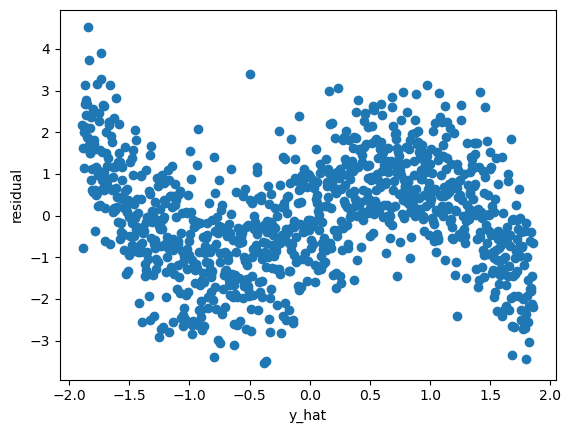

In [28]:
plt.scatter(yhat, e)
plt.xlabel('y_hat')
plt.ylabel('residual');

### Thinkening - Regression and heteroskedaticity

In [29]:
# another example on heteroskedaticity

x = np.linspace(0, 10, 1000)
noise = np.random.normal(0, 0.3, 1000)
noise = noise * x
y = x + noise

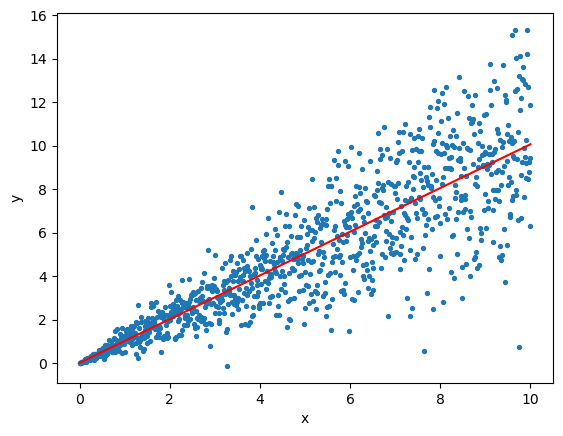

In [30]:
x = x.reshape(-1 ,1)
linear_fit.fit(x, y)
plt.scatter(x, y, s=8, marker='o')
plt.plot(x, linear_fit.predict(x), 'r')
plt.xlabel('x')
plt.ylabel('y');

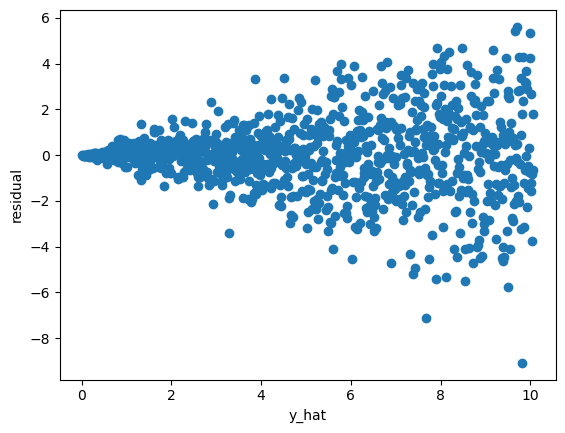

In [31]:
yhat = linear_fit.predict(x)
e = y - yhat
plt.scatter(yhat, e)
plt.xlabel('y_hat')
plt.ylabel('residual');

### Regression and Outliers

In [32]:
# a 3rd example with outliner
x = np.linspace(-1, 1, 1000)
x[-1] = 10
y = np.random.normal(0, 1, 1000)
y[-1] = 100

[2.33174063]


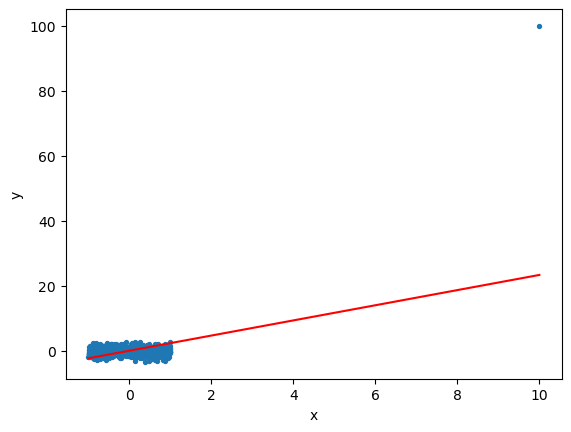

In [33]:
x = x.reshape(-1 ,1)
linear_fit.fit(x, y)
plt.scatter(x, y, s=8, marker='o')
plt.plot(x, linear_fit.predict(x), 'r')
plt.xlabel('x')
plt.ylabel('y');
print(linear_fit.coef_)

[-2.28389629]


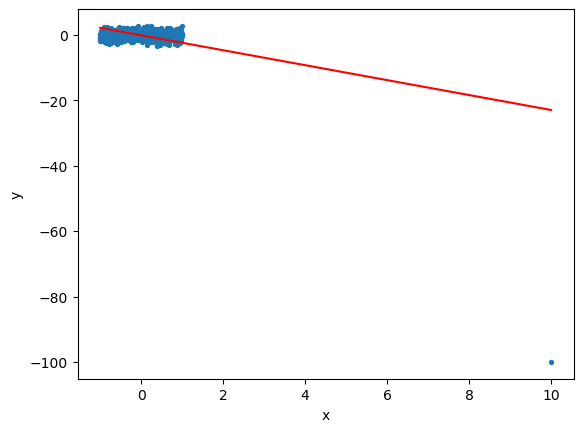

In [34]:
y[-1] = -100
x = x.reshape(-1 ,1)
linear_fit.fit(x, y)
plt.scatter(x, y, s=8, marker='o')
plt.plot(x, linear_fit.predict(x), 'r')
plt.xlabel('x')
plt.ylabel('y');
print(linear_fit.coef_)